In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [ ]:
census = pd.read_csv('Census.csv')

In [ ]:
census.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [ ]:
del census['Person ID']

check for missing values

In [ ]:
census.isnull().sum()

Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

Since 'No of hours' column is missing more than half of the records we cannot drop them so what we have to do is either fill the value of the missing values using either **ffill**, **bfil** or replace them with the mean value,mode median, the way i chose to complete this task is by first see how many outliers there are if they are a lot replace also the outliers with the mean value and then replace the empty values with the mean.

<Axes: >

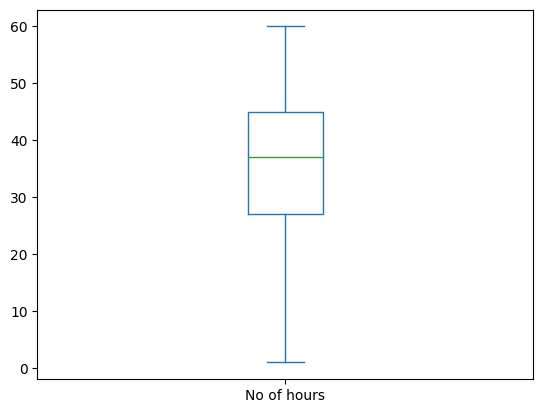

In [ ]:
census['No of hours'].plot(kind='box')

In [ ]:
replacedWithMean = pd.read_csv('Census.csv')
replacedWithMedian = pd.read_csv('Census.csv')
replacedWithMode = pd.read_csv('Census.csv')
replacedWithFfil = pd.read_csv('Census.csv')
replacedWithBfil = pd.read_csv('Census.csv')
noOfHoursMean = replacedWithMean['No of hours'].mean()
noOfHoursMedian = replacedWithMedian['No of hours'].median()
noOfHoursMode = replacedWithMode['No of hours'].mode()[0]
print('Mean :',noOfHoursMean)
print('Median :',noOfHoursMedian)
print('Mode :',noOfHoursMode)

Mean : 35.23478885195143
Median : 37.0
Mode : 41.0


In [ ]:
replacedWithMean['No of hours'].fillna(noOfHoursMean, inplace = True)
replacedWithMedian['No of hours'].fillna(noOfHoursMedian, inplace = True)
replacedWithMode['No of hours'].fillna(noOfHoursMode, inplace = True)
replacedWithFfil['No of hours'].fillna(method='ffill', inplace=True)
replacedWithBfil['No of hours'].fillna(method='bfill', inplace=True)


make a plot box now to see what changed after replacing the missing values with each of the calculated statistics.

count    569740.000000
mean         35.234789
std           9.263227
min           1.000000
25%          35.234789
50%          35.234789
75%          36.000000
max          60.000000
Name: No of hours, dtype: float64


<Axes: >

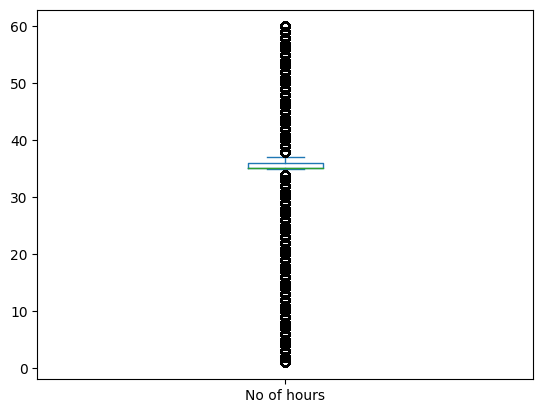

In [ ]:
print(replacedWithMean['No of hours'].describe())
replacedWithMean['No of hours'].plot(kind='box')

count    569740.000000
mean         36.171462
std           9.305023
min           1.000000
25%          37.000000
50%          37.000000
75%          37.000000
max          60.000000
Name: No of hours, dtype: float64


<Axes: >

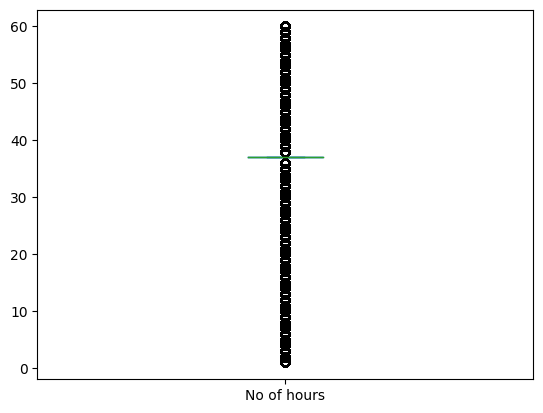

In [ ]:
print(replacedWithMedian['No of hours'].describe())
replacedWithMedian['No of hours'].plot(kind='box')

count    569740.000000
mean         38.293981
std           9.699775
min           1.000000
25%          38.000000
50%          41.000000
75%          41.000000
max          60.000000
Name: No of hours, dtype: float64


<Axes: >

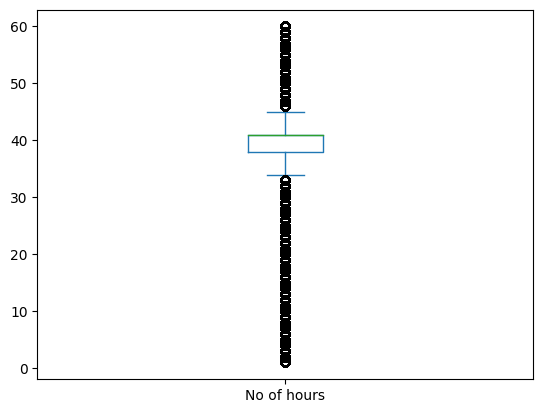

In [ ]:
print(replacedWithMode['No of hours'].describe())
replacedWithMode['No of hours'].plot(kind='box')

ffil method doesn't work since the first record is missing

count    267419.000000
mean         35.234789
std          13.520881
min           1.000000
25%          27.000000
50%          37.000000
75%          45.000000
max          60.000000
Name: No of hours, dtype: float64


<Axes: >

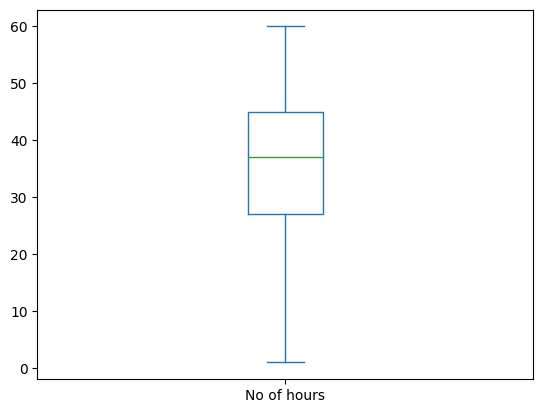

In [ ]:
print(replacedWithFfil['No of hours'].describe())
replacedWithFfil['No of hours'].plot(kind='box')

count    569740.000000
mean         17.599421
std          18.997615
min           1.000000
25%           2.000000
50%           2.000000
75%          36.000000
max          60.000000
Name: No of hours, dtype: float64


<Axes: >

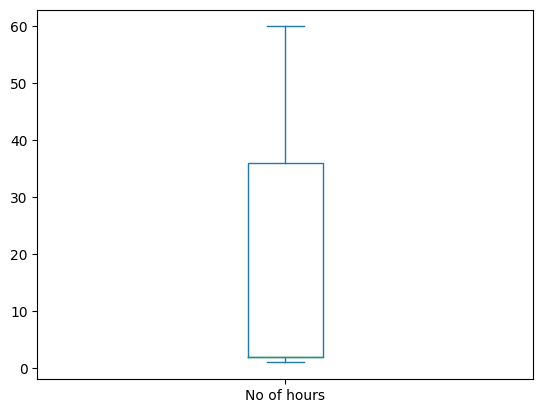

In [ ]:
print(replacedWithBfil['No of hours'].describe())
replacedWithBfil['No of hours'].plot(kind='box')

After observing what the replacement with mean mode and median, ffill and bfill did to the dataset from what can be observed from the boxplot we can say that we get the best results by replacing the empty values with the bfil method. So now we can go ahead and replace in the census dataframe the missing values with the mode.

In [ ]:
census['No of hours'].fillna(method='bfill', inplace=True)

In [ ]:
census.isnull().sum()

Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

In [ ]:
census['Region'] = census['Region'].replace(['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009', 'W92000004'], ['North East', 'North West',  'Yorkshire and the Humber', 'East Midlands', 'West Midlands', 'East of England', 'London', 'South East', 'South West', 'Wales'])
print(census['Region'].value_counts())

South East                  88084
London                      83582
North West                  71436
East of England             59411
West Midlands               56875
South West                  53774
Yorkshire and the Humber    53471
East Midlands               45782
Wales                       30976
North East                  26349
Name: Region, dtype: int64


In [ ]:
census['Residence Type'] = census['Residence Type'].replace(['C', 'H'], ['Resident in a communal establishment', 'Not a resident in a communal establishment'])
print(census['Residence Type'].value_counts())

Not a resident in a communal establishment    559086
Resident in a communal establishment           10654
Name: Residence Type, dtype: int64


In [ ]:
census['Family Composition'] = census['Family Composition'].replace([1,2,3,4,5,6,-9], ['Not in a family', 'Married/same-sex civil partnership couple family', 'Cohabiting couple family', 'Lone parent family(male head)', 'Lone parent family(female head)', 'Other related family', 'No code required'])
print(census['Family Composition'].value_counts())

Married/same-sex civil partnership couple family    300961
Not in a family                                      96690
Cohabiting couple family                             72641
Lone parent family(female head)                      64519
No code required                                     18851
Lone parent family(male head)                         9848
Other related family                                  6230
Name: Family Composition, dtype: int64


In [ ]:
census['Population Base'] = census['Population Base'].replace([1, 2, 3], ['Usual resident', 'Student living away from home during term-time', 'Short-term resident'])
print(census['Population Base'].value_counts())

Usual resident                                    561039
Student living away from home during term-time      6730
Short-term resident                                 1971
Name: Population Base, dtype: int64


In [ ]:
census['Sex'] = census['Sex'].replace([1, 2], ['Male', 'Female'])
print(census['Sex'].value_counts())

Female    289172
Male      280568
Name: Sex, dtype: int64


In [ ]:
census['Age'] = census['Age'].replace([1, 2, 3, 4, 5, 6, 7, 8], ['0-15', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 and over'])
print(census['Age'].value_counts())

0-15           106832
35-44           78641
45-54           77388
25-34           75948
16-24           72785
55-64           65665
65-74           48777
75 and over     43704
Name: Age, dtype: int64


In [ ]:
census['Marital Status'] = census['Marital Status'].replace([1, 2, 3, 4, 5], ['Single (never married or never registered a same-sex civil partnership)', 'Married or in a registered same-sex civil partnership', 'Separated but still legally married or separated but still legally in a same-sex civil partnership', 'Divorced or formerly in a same-sex civil partnership which is now legally dissolved', 'Widowed or surviving partner from a same-sex civil partnership'])
print(census['Marital Status'].value_counts())

Single (never married or never registered a same-sex civil partnership)                               270999
Married or in a registered same-sex civil partnership                                                 214179
Divorced or formerly in a same-sex civil partnership which is now legally dissolved                    40713
Widowed or surviving partner from a same-sex civil partnership                                         31898
Separated but still legally married or separated but still legally in a same-sex civil partnership     11951
Name: Marital Status, dtype: int64


In [ ]:
census['Student'] = census['Student'].replace([1, 2], ['Student', 'Not a Student'])
print(census['Student'].value_counts())

Not a Student    443203
Student          126537
Name: Student, dtype: int64


In [ ]:
census['Country of Birth'] = census['Country of Birth'].replace([1, 2, -9], ['UK', 'Non UK', 'No Code Required'])
print(census['Country of Birth'].value_counts())

UK                  485645
Non UK               77291
No Code Required      6804
Name: Country of Birth, dtype: int64


In [ ]:
census['Health'] = census['Health'].replace([1, 2, 3, 4, 5, -9], ['Very good health', 'Good health', 'Fair health', 'Bad health', 'Very bad health', 'No code required'])
print(census['Health'].value_counts())

Very good health    264971
Good health         191743
Fair health          74480
Bad health           24558
Very bad health       7184
No code required      6804
Name: Health, dtype: int64


In [ ]:
census['Ethnic Group'] = census['Ethnic Group'].replace([1, 2, 3, 4, 5, -9], ['White', 'Mixed', 'Asian and Asian British', 'Black or Black British', 'Chinese or Other ethnic group', 'Not resident in England or Wales, students or schoolchildren living away during term-time'])
print(census['Ethnic Group'].value_counts())

White                                                                                        483477
Asian and Asian British                                                                       42711
Black or Black British                                                                        18786
Mixed                                                                                         12209
Not resident in England or Wales, students or schoolchildren living away during term-time      6804
Chinese or Other ethnic group                                                                  5753
Name: Ethnic Group, dtype: int64


In [ ]:
census['Religion'] = census['Religion'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['No religion', 'Christian', 'Buddhist', 'Hindu', 'Jewish',  'Muslim', 'Sikh', 'Other religion', 'Not stated', 'No code required'])
print(census['Religion'].value_counts())

Christian           333481
No religion         141658
Not stated           40613
Muslim               27240
Hindu                 8213
No code required      6804
Sikh                  4215
Jewish                2572
Buddhist              2538
Other religion        2406
Name: Religion, dtype: int64


In [ ]:
census['Economic Activity'] = census['Economic Activity'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Economically active: Employee', 'Economically active: Self-employed', 'Economically active: Unemployed', 'Economically active: Full-time student', 'Economically inactive: Retired',  'Economically inactive: Student', 'Economically inactive: Looking after home or family', 'Economically inactive: Long-term sick or disabled', 'Economically inactive: Other', 'No code required'])
print(census['Economic Activity'].value_counts())

Economically active: Employee                          216024
No code required                                       112618
Economically inactive: Retired                          97480
Economically active: Self-employed                      40632
Economically inactive: Student                          24756
Economically active: Unemployed                         18109
Economically inactive: Long-term sick or disabled       17991
Economically inactive: Looking after home or family     17945
Economically active: Full-time student                  14117
Economically inactive: Other                            10068
Name: Economic Activity, dtype: int64


In [ ]:
census['Occupation'] = census['Occupation'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Managers, Directors and Senior Officials', 'Professional Occupations', 'Associate Professional and Technical Occupations', 'Administrative and Secretarial Occupations', 'Skilled Trades Occupations',  'Caring, Leisure and Other Service Occupations', 'Sales and Customer Service Occupations', 'Process, Plant and Machine Operatives', 'Elementary Occupations', 'No code required'])
print(census['Occupation'].value_counts())

No code required                                    149984
Professional Occupations                             64111
Elementary Occupations                               58483
Administrative and Secretarial Occupations           53254
Skilled Trades Occupations                           48546
Associate Professional and Technical Occupations     44937
Managers, Directors and Senior Officials             39788
Sales and Customer Service Occupations               38523
Caring, Leisure and Other Service Occupations        37297
Process, Plant and Machine Operatives                34817
Name: Occupation, dtype: int64


In [ ]:
census['Industry'] = census['Industry'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9], ['Agriculture, forestry and fishing', 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply', 'Construction', 'Wholesale and retail trade; Repair of motor vehicles and motorcycles', 'Accommodation and food service activities',  'Transport and storage; Information and communication', 'Financial and insurance activities; Intermediation', 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies', 'No code required'])
print(census['Industry'].value_counts())

No code required                                                                                                                                    149984
Wholesale and retail trade; Repair of motor vehicles and motorcycles                                                                                 68878
Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply                                               53433
Real estate activities; Professional, scientific and technical activities; Administrative and support service activities                             49960
Human health and social work activities                                                                                                              49345
Education                                                                                                                                            40560
Transport and storage; Information and communication                  

In [ ]:
census['Hours worked per week'] = census['Hours worked per week'].replace([1, 2, 3, 4, -9], ['Part-time: 15 or less hours worked', 'Part-time: 16 to 30 hours worked', 'Full-time: 31 to 48 hours worked', 'Full-time: 49 or more hours worked', 'No code required'])
print(census['Hours worked per week'].value_counts())

No code required                      302321
Full-time: 31 to 48 hours worked      153937
Part-time: 16 to 30 hours worked       52133
Full-time: 49 or more hours worked     35573
Part-time: 15 or less hours worked     25776
Name: Hours worked per week, dtype: int64


In [ ]:
census['Approximated Social Grade'] = census['Approximated Social Grade'].replace([1, 2, 3, 4, -9], ['AB', 'C1', 'C2', 'DE', 'No code required'])
print(census['Approximated Social Grade'].value_counts())

C1                  159642
No code required    124103
DE                  123739
AB                   82320
C2                   79936
Name: Approximated Social Grade, dtype: int64


In [ ]:
census.dtypes

Region                        object
Residence Type                object
Family Composition            object
Population Base               object
Sex                           object
Age                           object
Marital Status                object
Student                       object
Country of Birth              object
Health                        object
Ethnic Group                  object
Religion                      object
Economic Activity             object
Occupation                    object
Industry                      object
Hours worked per week         object
No of hours                  float64
Approximated Social Grade     object
dtype: object

After transforming the data from numerical to it's categorical form now, im going to print the statistics for those features and then interpret them.

In [ ]:
census.describe(include='object').T

,count,unique,top,freq
Region,569740,10,South East,88084
Residence Type,569740,2,Not a resident in a communal establishment,559086
Family Composition,569740,7,Married/same-sex civil partnership couple family,300961
Population Base,569740,3,Usual resident,561039
Sex,569740,2,Female,289172
Age,569740,8,0-15,106832
Marital Status,569740,5,Single (never married or never registered a sa...,270999
Student,569740,2,Not a Student,443203
Country of Birth,569740,3,UK,485645
Health,569740,6,Very good health,264971


In [ ]:
census.shape

(569740, 18)

In [ ]:
census[['No of hours']].describe().T

,count,mean,std,min,25%,50%,75%,max
No of hours,569740.0,16.538161,19.875004,0.0,0.0,0.0,36.0,60.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
pearsonCorrDataframe = pd.read_csv('Census.csv')
pearsonCorrDataframe['Region'] = LE.fit_transform(pearsonCorrDataframe['Region'])
pearsonCorrDataframe['Residence Type'] = LE.fit_transform(pearsonCorrDataframe['Residence Type'])

In [ ]:
pearsoncorr=pearsonCorrDataframe.corr(method='pearson')
pearsoncorr

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
Person ID,1.000000,0.108667,0.011954,0.020222,0.009318,0.000713,-0.042578,-0.035477,-0.021902,0.048902,0.003692,0.121011,0.069977,-0.000898,-0.035327,-0.021175,-0.008133,0.016197,-0.009466
Region,0.108667,1.000000,-0.002683,-0.018448,0.015484,-0.000065,-0.000452,-0.007568,-0.002115,0.010344,-0.028457,0.013241,0.000220,-0.008684,-0.013364,0.016585,0.019030,0.009094,-0.014485
Residence Type,0.011954,-0.002683,1.000000,0.644450,-0.066833,0.000245,-0.020930,-0.024958,0.067139,-0.009405,-0.037271,-0.006558,-0.006730,-0.103319,0.034697,0.043626,0.085608,0.024612,0.256465
Family Composition,0.020222,-0.018448,0.644450,1.000000,-0.549776,0.034963,-0.099108,-0.053558,0.069528,0.468857,0.348698,0.415991,0.243173,-0.068047,0.022910,0.023295,0.081348,-0.030135,0.204884
Population Base,0.009318,0.015484,-0.066833,-0.549776,1.000000,-0.003257,-0.093765,-0.075922,-0.173726,-0.607982,-0.538930,-0.511280,-0.328558,-0.112281,-0.134767,-0.131798,-0.085421,-0.004243,-0.218789
Sex,0.000713,-0.000065,0.000245,0.034963,-0.003257,1.000000,0.042331,0.129012,0.017002,0.004219,0.021962,-0.003136,0.000088,0.055828,0.002330,0.087056,-0.089004,-0.286324,0.022335
Age,-0.042578,-0.000452,-0.020930,-0.099108,-0.093765,0.042331,1.000000,0.639171,0.614706,0.097469,0.380836,-0.006106,0.043481,0.666782,0.582689,0.569801,0.076730,0.008495,0.626284
Marital Status,-0.035477,-0.007568,-0.024958,-0.053558,-0.075922,0.129012,0.639171,1.000000,0.390542,0.083748,0.277108,0.018628,0.050471,0.392210,0.347050,0.337996,0.023275,-0.003460,0.368890
Student,-0.021902,-0.002115,0.067139,0.069528,-0.173726,0.017002,0.614706,0.390542,1.000000,0.202745,0.329645,0.094765,0.079475,0.548938,0.637396,0.649214,0.418439,0.269756,0.673739
Country of Birth,0.048902,0.010344,-0.009405,0.468857,-0.607982,0.004219,0.097469,0.083748,0.202745,1.000000,0.750955,0.850926,0.522021,0.225101,0.173508,0.172849,0.114362,0.009205,0.218202


The above correlation was taken into consideration for the attributes compared below

Visualisation and interpretation of data and relationships

<Axes: >

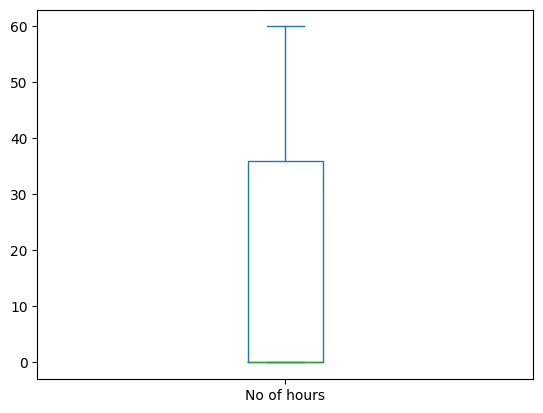

In [ ]:
census['No of hours'].plot(kind='box')

Note:Replace with zero and see the boxplot

Approximated Social Grade     AB     C1     C2     DE  No code required
Age                                                                    
0-15                           0      0      0      0            106832
16-24                       3305  37868   7252  13870             10490
25-34                      17533  25831  12606  18333              1645
35-44                      18755  25450  15038  18728               670
45-54                      15942  24638  16723  19583               502
55-64                      12829  20081  13596  18680               479
65-74                       8187  13705   9202  17233               450
75 and over                 5769  12069   5519  17312              3035


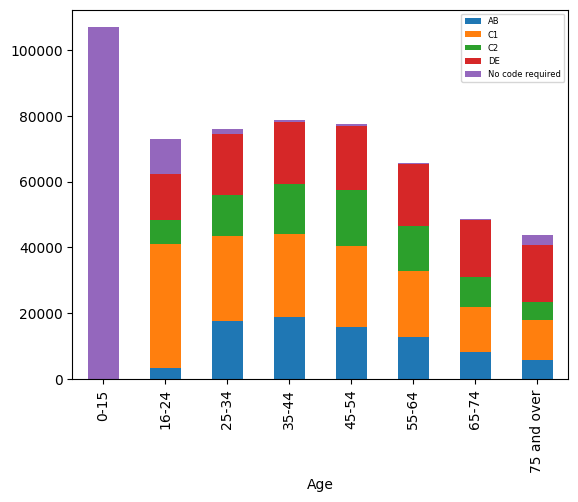

In [ ]:
c_ct = pd.crosstab(census['Age'], census['Approximated Social Grade'])
graph = c_ct.plot(kind='bar', stacked=True)
graph.legend(fontsize=6)
print(c_ct)

From the graph above we can see the relationship between age and social grade. on the y axis the number of individuals in each age group. From what we can see the majority of individuals in our dataset are under the age of 16 and don't have their own social grade. Another key insight is that the most common social grade for individuals between the ages of 16-64 is the C1 social grade and very closely behind is the DE social grade. From the graph we can see that the DE social grade is the most dominand for ages 65 and above. We can also see that the least common social grades from age 16 and above are C2 and AB.Out of the two least frequent we can say that AB is more common for ages 25-44 and 75 and above while C2 is more common in the ages 45-74  

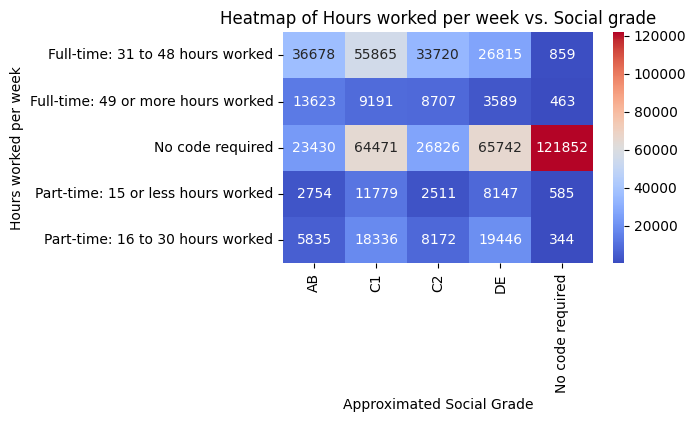

In [ ]:
pivot_table = pd.crosstab(census['Hours worked per week'], census['Approximated Social Grade'])
plt.figure(figsize=(5, 3))  # Adjust the figure size if needed
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Hours worked per week vs. Social grade')
plt.show()


Residence Type    Not a resident in a communal establishment  \
Health                                                         
Bad health                                             23488   
Fair health                                            72154   
Good health                                           188811   
No code required                                        6668   
Very bad health                                         6720   
Very good health                                      261245   

Residence Type    Resident in a communal establishment  
Health                                                  
Bad health                                        1070  
Fair health                                       2326  
Good health                                       2932  
No code required                                   136  
Very bad health                                    464  
Very good health                                  3726  


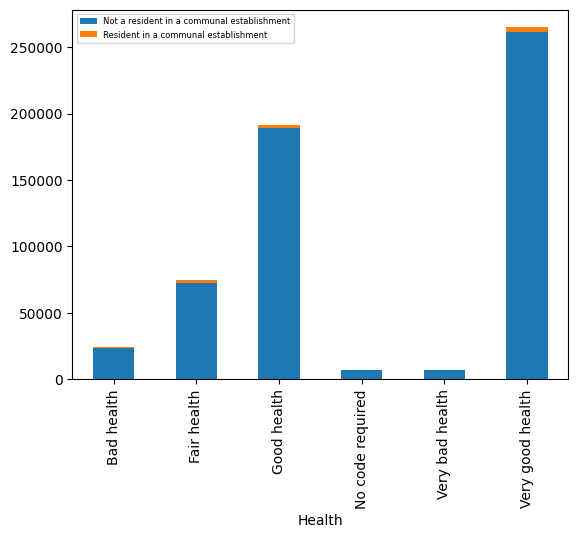

In [ ]:
c_ct2 = pd.crosstab(census['Health'], census['Residence Type'])
graph = c_ct2.plot(kind='bar', stacked=True)
graph.legend(fontsize=6)
print(c_ct2)

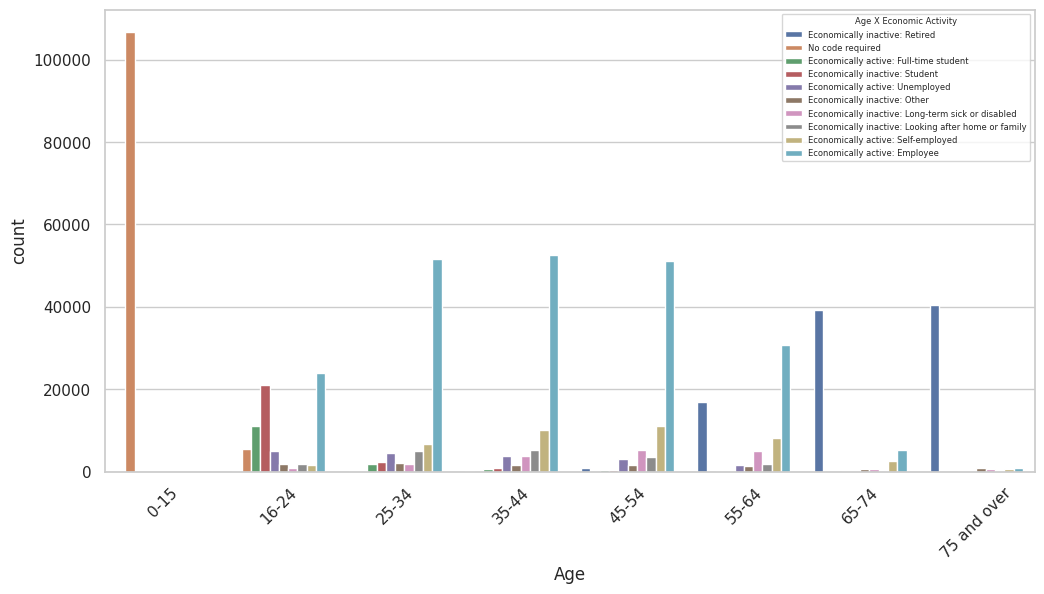

In [ ]:
age_order = sorted(census['Age'].unique())

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Pass the 'age_order' to the 'order' parameter in countplot
sns.countplot(data=census, x='Age', hue='Economic Activity', order=age_order)

plt.xticks(rotation=45)

# Reduce the legend size
legend = plt.legend(title='Age X Economic Activity', fontsize='6')
legend.get_title().set_fontsize('6')  # Set the title font size

plt.show()

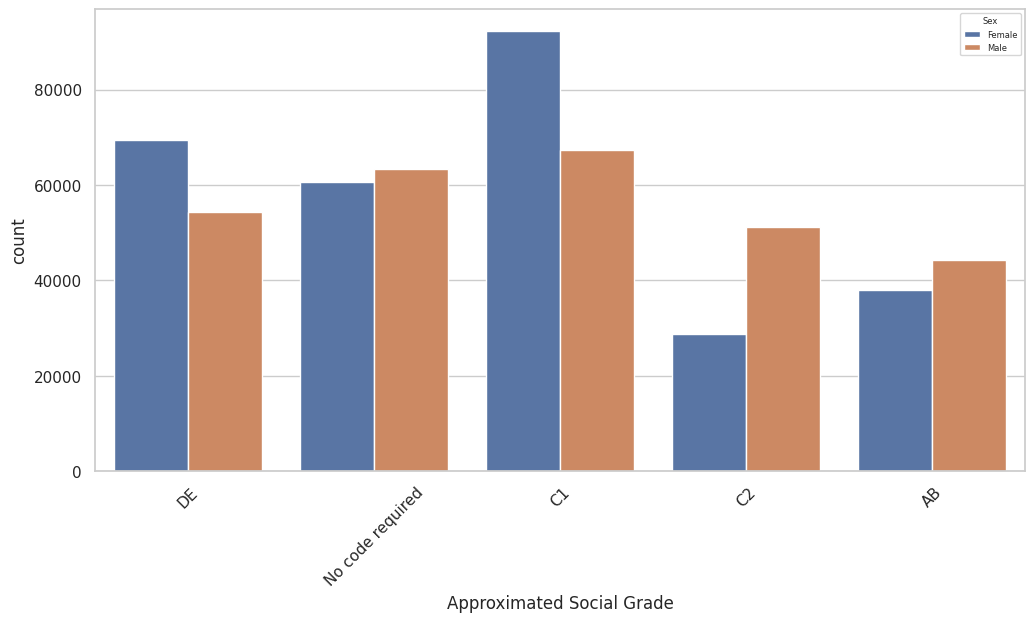

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=census, x='Approximated Social Grade', hue='Sex')
plt.xticks(rotation=45)

# Reduce the legend size
legend = plt.legend(title='Sex', fontsize='6')
legend.get_title().set_fontsize('6')  # Set the title font size

plt.show()